In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [4]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Bearing/CWRU/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Bearing/CWRU/CWRU_48k_load_1_CNN_data.npz
/content/drive/MyDrive/Bearing/CWRU/feature_time_48k_2048_load_1.csv
/content/drive/MyDrive/Bearing/CWRU/raw/B007_1_123.mat
/content/drive/MyDrive/Bearing/CWRU/raw/B014_1_190.mat
/content/drive/MyDrive/Bearing/CWRU/raw/B021_1_227.mat
/content/drive/MyDrive/Bearing/CWRU/raw/IR007_1_110.mat
/content/drive/MyDrive/Bearing/CWRU/raw/IR014_1_175.mat
/content/drive/MyDrive/Bearing/CWRU/raw/IR021_1_214.mat
/content/drive/MyDrive/Bearing/CWRU/raw/OR007_6_1_136.mat
/content/drive/MyDrive/Bearing/CWRU/raw/Time_Normal_1_098.mat
/content/drive/MyDrive/Bearing/CWRU/raw/OR021_6_1_239.mat
/content/drive/MyDrive/Bearing/CWRU/raw/OR014_6_1_202.mat


In [5]:
path = "/content/drive/MyDrive/Bearing/CWRU/"

data_time = pd.read_csv(path + "feature_time_48k_2048_load_1.csv")
data_time

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


In [8]:
train_data , test_data = train_test_split(data_time, test_size = 750, stratify= data_time['fault'], random_state= 42)
print(train_data['fault'].value_counts(), "\n\n", test_data['fault'].value_counts())

Ball_007_1    155
Ball_021_1    155
Ball_014_1    155
IR_014_1      155
OR_014_6_1    155
Normal_1      155
IR_007_1      155
OR_007_6_1    155
OR_021_6_1    155
IR_021_1      155
Name: fault, dtype: int64 

 Ball_007_1    75
Ball_021_1    75
Ball_014_1    75
IR_014_1      75
OR_014_6_1    75
Normal_1      75
IR_007_1      75
OR_007_6_1    75
OR_021_6_1    75
IR_021_1      75
Name: fault, dtype: int64


In [9]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1]) #마지막 fault칼럼만 스킵한다 
pd.DataFrame(train_data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03,1.550000e+03
mean,-4.140057e-17,-6.038181e-17,2.391635e-16,4.154383e-17,-6.303202e-18,-2.363701e-17,-5.808973e-17,-3.024821e-16,8.466346e-17
std,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00,1.000323e+00
min,-8.942990e-01,-2.956664e+00,-1.923943e+00,-9.248604e-01,-9.221846e-01,-5.682304e+00,-7.821359e-01,-1.518039e+00,-7.990715e-01
25%,-7.060284e-01,-3.881874e-01,-6.978091e-01,-6.754427e-01,-6.761989e-01,-3.586901e-01,-6.048581e-01,-7.928560e-01,-6.641724e-01
50%,-5.074241e-01,5.104057e-01,-2.919500e-01,-4.994251e-01,-4.955568e-01,2.077991e-01,-4.184581e-01,-2.019435e-01,-4.610089e-01
75%,4.521712e-01,7.019650e-01,4.581862e-01,7.204965e-01,7.193669e-01,5.700295e-01,2.783337e-01,5.541733e-01,4.509123e-01
max,3.311454e+00,8.647872e-01,3.507114e+00,2.921441e+00,2.922825e+00,6.264490e+00,6.240442e+00,4.023748e+00,5.485167e+00


In [10]:
test_data_scaled = (test_data.iloc[:, : -1].values - scaler.mean_) / np.sqrt(scaler.var_)
pd.DataFrame(test_data_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,-0.000412,-0.005787,0.008013,0.015218,0.015252,-0.081776,-0.003752,-0.017564,0.022974
std,0.986058,0.996121,0.999180,1.014993,1.014983,1.093872,0.978996,0.985828,1.064872
min,-0.886012,-2.799566,-1.908802,-0.920534,-0.920573,-6.008985,-0.741642,-1.381722,-0.791215
25%,-0.704644,-0.402131,-0.671217,-0.671214,-0.671655,-0.427719,-0.603422,-0.801463,-0.655701
50%,-0.477290,0.497210,-0.308158,-0.494060,-0.491310,0.179815,-0.413594,-0.259176,-0.462906
75%,0.401433,0.696015,0.435391,0.692923,0.691678,0.552564,0.268409,0.538556,0.513954
max,3.107239,0.859067,2.992000,3.016935,3.018397,2.887502,4.744366,3.752917,10.052578


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [12]:
#Initialize the model
rf_model = RandomForestClassifier(n_estimators = 300, max_features="sqrt", n_jobs=-1, random_state=42)
rf_model.fit(train_data_scaled, train_data['fault'])

RandomForestClassifier(max_features='sqrt', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [14]:
train_predictions = rf_model.predict(train_data_scaled)
test_predictions = rf_model.predict(test_data_scaled)

In [15]:
train_confusion_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confusion_matrix = confusion_matrix(test_data['fault'], test_predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


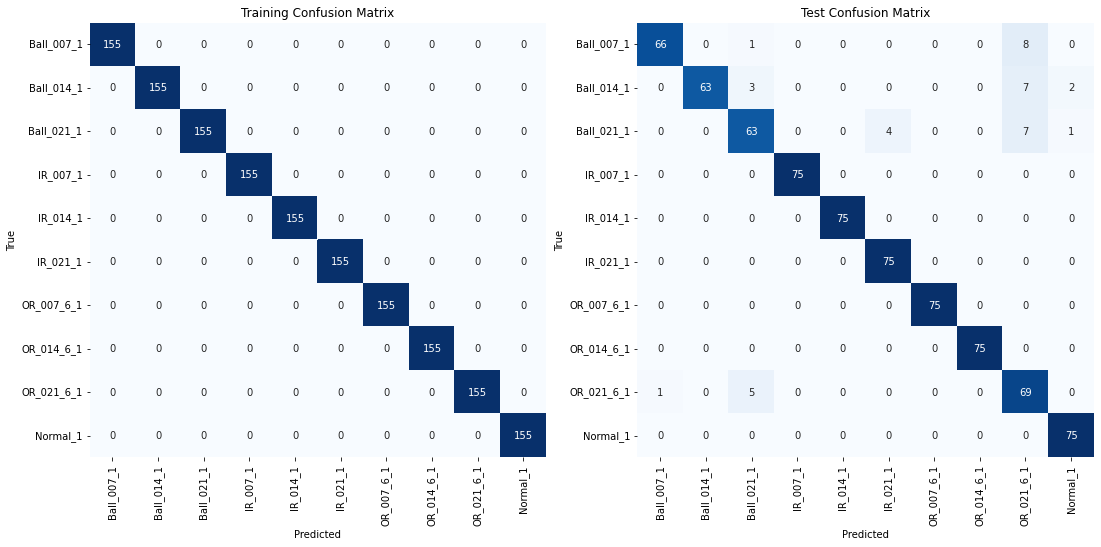

In [17]:
fault_type = data_time.fault.unique()
plt.figure(1, figsize=(18, 8))

plt.subplot(121)
sns.heatmap(
    train_confusion_matrix,
    annot=True, fmt = "d",
    xticklabels = fault_type,
    yticklabels = fault_type,
    cmap = "Blues",
    cbar = False
    )
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.subplot(122)

plt.subplot(122)
sns.heatmap(
    test_confusion_matrix,
    annot=True,
    xticklabels=fault_type,
    yticklabels=fault_type,
    cmap = "Blues",
    cbar = False
)

plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

# 우측그림에서 Test Data 중 몇개 오분류 한 것을 볼 수 있다.

In [18]:
print("Accuracy:", accuracy_score(test_data['fault'], test_predictions))

Accuracy: 0.948


In [19]:
class_report = classification_report(y_pred= test_predictions, y_true=test_data['fault'])
print(class_report)

              precision    recall  f1-score   support

  Ball_007_1       0.99      0.88      0.93        75
  Ball_014_1       1.00      0.84      0.91        75
  Ball_021_1       0.88      0.84      0.86        75
    IR_007_1       1.00      1.00      1.00        75
    IR_014_1       1.00      1.00      1.00        75
    IR_021_1       0.95      1.00      0.97        75
    Normal_1       1.00      1.00      1.00        75
  OR_007_6_1       1.00      1.00      1.00        75
  OR_014_6_1       0.76      0.92      0.83        75
  OR_021_6_1       0.96      1.00      0.98        75

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



In [20]:
#Obtain feature importance
feature_importance = rf_model.feature_importances_
#Check that importances sum is 1 
feature_importance.sum()

1.0

In [24]:
features

Index(['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest',
       'form'],
      dtype='object')

In [23]:
#Retrives featuures names
features = train_data.columns[:-1]
num_features = len(features)

#Sort features by descending importance
indices = np.argsort(feature_importance)[::-1]

#Reorder dict by descending feature importance
features_sorted = []
for key in indices:
  features_sorted = np.append(features_sorted, features[key])

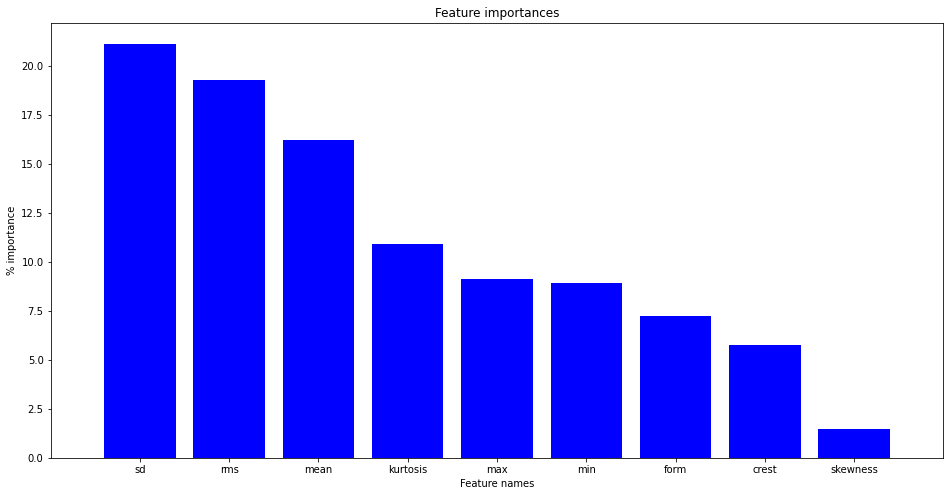

In [25]:
plt.figure(figsize=(16, 8))
plt.title("Feature importances")

plt.bar(range(num_features), feature_importance[indices] * 100,
        color = 'blue', align="center")
plt.xticks(range(num_features), features_sorted)
plt.xlim([-1, num_features])
plt.ylabel('% importance')
plt.xlabel('Feature names')
plt.show()